In [ ]:
import os



# Define the paths to the data folders on your Google Drive
data_folder = '/content/drive/MyDrive/Image Segmentation/'

images_folder = os.path.join(data_folder, 'images')
ground_truth_folder = os.path.join(data_folder, 'ground_truth')

# Function to get file paths from a directory
def get_file_paths(directory):
    file_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_paths.append(os.path.join(root, file))
    return file_paths

# Get file paths for images and ground truth folders
image_paths_test = get_file_paths(os.path.join(images_folder, 'test'))
ground_truth_paths_test = get_file_paths(os.path.join(ground_truth_folder, 'test'))




In [ ]:
image_paths_test.sort()
ground_truth_paths_test.sort()


In [ ]:
image_paths_test = image_paths_test[:50]
ground_truth_paths_test = ground_truth_paths_test[:50]

In [ ]:
len(image_paths_test),len(ground_truth_paths_test)

(50, 50)

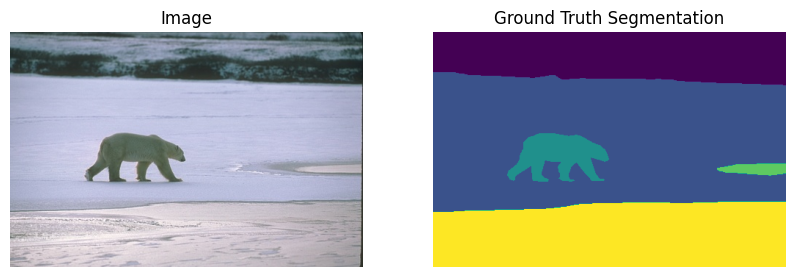

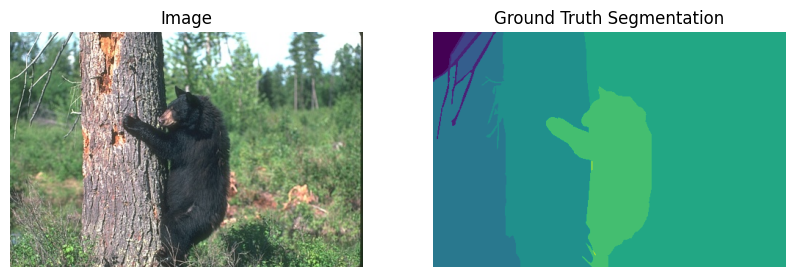

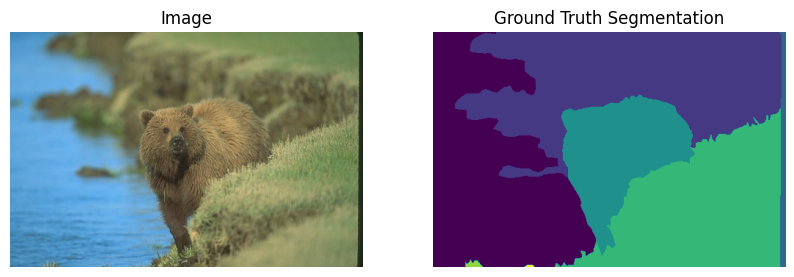

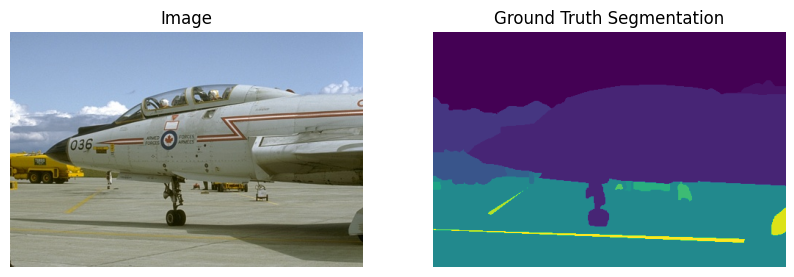

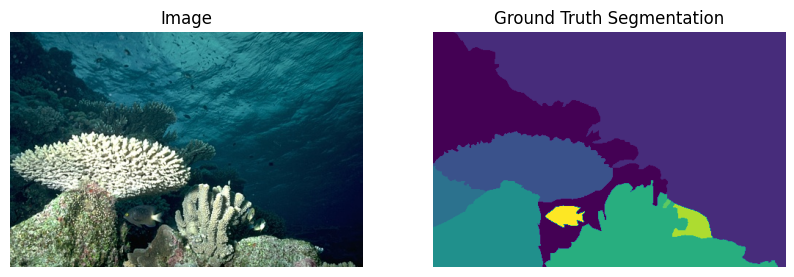

In [ ]:
from PIL import Image
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

def display_image_with_ground_truth(image_path, ground_truth_path):
    # Load image
    image = np.array(Image.open(image_path))

    # Load ground truth segmentation
    ground_truth_data = loadmat(ground_truth_path)
    ground_truth_segmentation = ground_truth_data['groundTruth'][0, 0]['Segmentation'][0, 0]

    # Display image and ground truth segmentation
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(ground_truth_segmentation)
    plt.title('Ground Truth Segmentation')
    plt.axis('off')

    plt.show()

# Display 5 sample images with their ground truth segmentation
sample_test_image_paths = image_paths_test[:5]
sample_test_ground_truth_paths = ground_truth_paths_test[:5]

for image_path, ground_truth_path in zip(sample_test_image_paths, sample_test_ground_truth_paths):
    display_image_with_ground_truth(image_path, ground_truth_path)


In [ ]:

from sklearn.cluster import KMeans

def k_means_segmentation(image, k):
    flattened_image = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(flattened_image)
    segmented_image = labels.reshape(image.shape[:2])
    return segmented_image

# Example code to apply K-means segmentation
k_values = [3, 5, 7, 9, 11]
segmentation_results = {}

for k in k_values:
    segmented_images = []
    for image_path in image_paths_test :
        image = np.array(Image.open(image_path))
        segmented_image = k_means_segmentation(image, k)
        segmented_images.append(segmented_image)

    segmentation_results[k] = segmented_images


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
def load_ground_truth_segmentations(ground_truth_paths):
    segmentations = []
    for path in ground_truth_paths:
        ground_truth_data = loadmat(path)
        segmentation = ground_truth_data['groundTruth'][0, 0]['Segmentation'][0, 0]
        segmentations.append(segmentation)

    return segmentations

ground_truth_segmentations = load_ground_truth_segmentations(ground_truth_paths_test)


In [ ]:
ground_truth_segmentations

[array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5]], dtype=uint16),
 array([[1, 1, 1, ..., 7, 7, 7],
        [1, 1, 1, ..., 7, 7, 7],
        [1, 1, 1, ..., 7, 7, 7],
        ...,
        [5, 5, 5, ..., 7, 7, 7],
        [5, 5, 5, ..., 7, 7, 7],
        [5, 5, 5, ..., 7, 7, 7]], dtype=uint16),
 array([[1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        ...,
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3]], dtype=uint16),
 array([[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [10, 10, 10, ..., 10, 10, 10],
        [10, 10, 10, ..., 10, 10, 10],
        [10, 10, 10, ..., 10, 10, 10]], dtype=uint16),
 array([[1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 

In [ ]:
len(ground_truth_segmentations)

50

In [ ]:
from sklearn.metrics import f1_score, mutual_info_score

def evaluate_segmentation_results(predicted_segmentations, ground_truth_segmentations):
    f_measures = []
    conditional_entropies = []

    for predicted, ground_truth in zip(predicted_segmentations, ground_truth_segmentations):
        predicted_flat = predicted.flatten()
        ground_truth_flat = ground_truth.flatten()

        # F-measure
        f_measure = f1_score(ground_truth_flat, predicted_flat, average='weighted')
        f_measures.append(f_measure)

        # Conditional Entropy
        conditional_entropy = mutual_info_score(ground_truth_flat, predicted_flat)
        conditional_entropies.append(conditional_entropy)

    return f_measures, conditional_entropies


evaluation_results = {}

for k, segmented_images in segmentation_results.items():
    f_measures, conditional_entropies = evaluate_segmentation_results(segmented_images, ground_truth_segmentations)
    average_f_measure = np.mean(f_measures)
    average_conditional_entropy = np.mean(conditional_entropies)

    evaluation_results[k] = {
        'average_f_measure': average_f_measure,
        'average_conditional_entropy': average_conditional_entropy
    }


In [ ]:
evaluation_results

{3: {'average_f_measure': 0.13590889851521706,
  'average_conditional_entropy': 0.31728226573008056},
 5: {'average_f_measure': 0.15420580829677352,
  'average_conditional_entropy': 0.4278405075793021},
 7: {'average_f_measure': 0.11083285196020894,
  'average_conditional_entropy': 0.4768726566263868},
 9: {'average_f_measure': 0.13654164902755292,
  'average_conditional_entropy': 0.5150035545984729},
 11: {'average_f_measure': 0.10058745119427,
  'average_conditional_entropy': 0.5489205956663255}}

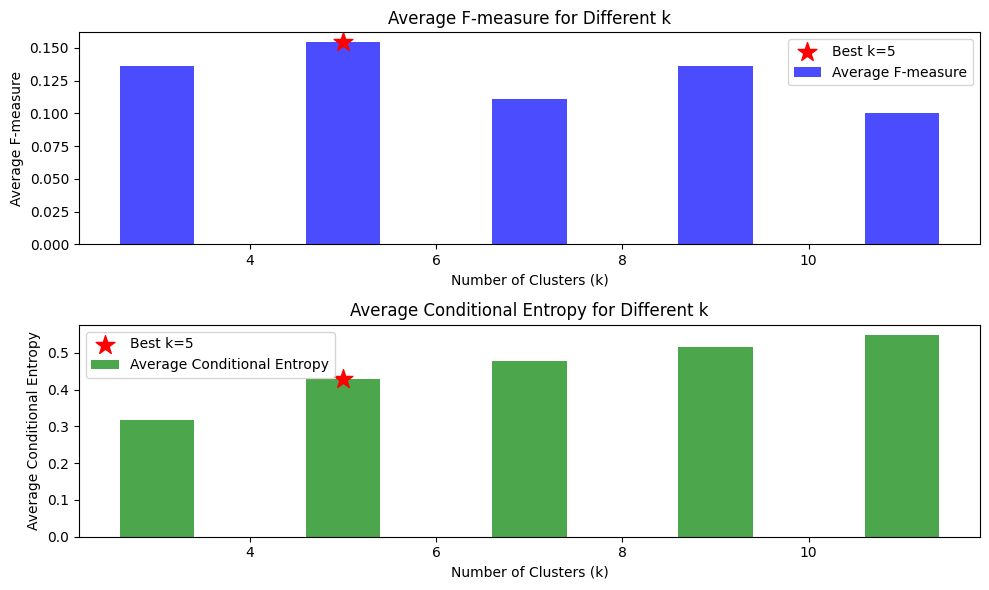

In [ ]:
k_values = list(evaluation_results.keys())
average_f_measures = [result['average_f_measure'] for result in evaluation_results.values()]
average_conditional_entropies = [result['average_conditional_entropy'] for result in evaluation_results.values()]

# Find the index of the best k based on average F-measure
best_k_index = np.argmax(average_f_measures)
best_k = k_values[best_k_index]

plt.figure(figsize=(10, 6))

# Plot average F-measures
plt.subplot(2, 1, 1)
plt.bar(k_values, average_f_measures, color='blue', alpha=0.7, label='Average F-measure')
plt.scatter(best_k, average_f_measures[best_k_index], color='red', marker='*', s=200, label=f'Best k={best_k}')
plt.title('Average F-measure for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average F-measure')
plt.legend()

# Plot average Conditional Entropies
plt.subplot(2, 1, 2)
plt.bar(k_values, average_conditional_entropies, color='green', alpha=0.7, label='Average Conditional Entropy')
plt.scatter(best_k, average_conditional_entropies[best_k_index], color='red', marker='*', s=200, label=f'Best k={best_k}')
plt.title('Average Conditional Entropy for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Conditional Entropy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Example usage

import matplotlib.pyplot as plt

def plot_segmentations(original_image, ground_truth_segmentation, segmented_image, title):
    plt.figure(figsize=(12, 12))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(ground_truth_segmentation, cmap='viridis')
    plt.title('Ground Truth Segmentation')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(segmented_image, cmap='viridis')
    plt.title(f'K-means Segmentation (K={title})')
    plt.axis('off')

    plt.show()



# Plot segmentations for a specific K value

def show_comparision(exemple_number):

  sample_image_path = image_paths_test[exemple_number]  # Use the path of the first test image
  sample_ground_truth_path = ground_truth_paths_test[exemple_number]  # Use the path of the corresponding ground truth

  # Load the sample image and ground truth segmentation
  sample_image = np.array(Image.open(sample_image_path))
  sample_ground_truth_data = loadmat(sample_ground_truth_path)
  sample_ground_truth_segmentation = sample_ground_truth_data['groundTruth'][0, 0]['Segmentation'][0, 0]

  # Loop over K values and plot the segmentations
  for k, segmented_images in segmentation_results.items():

      # Get the segmented image for the chosen example
      segmented_image = segmented_images[exemple_number]

      # Plot the segmentations
      plot_segmentations(sample_image, sample_ground_truth_segmentation, segmented_image, k)


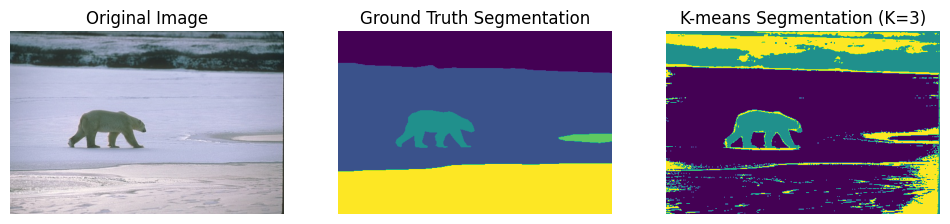

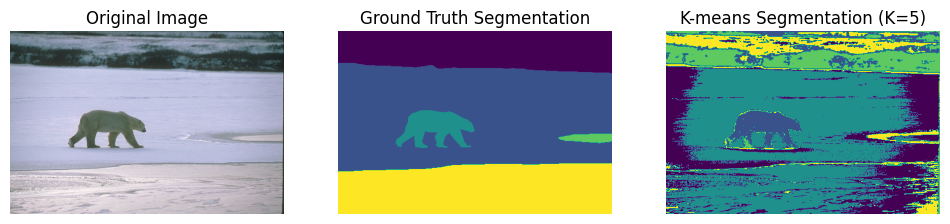

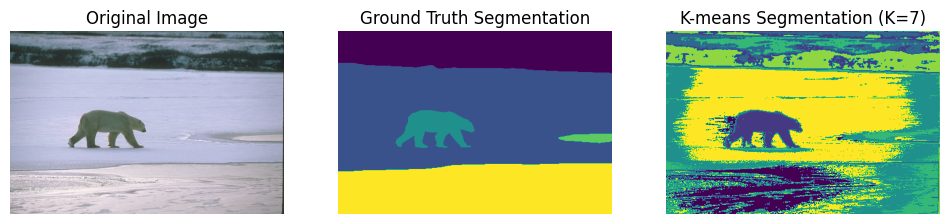

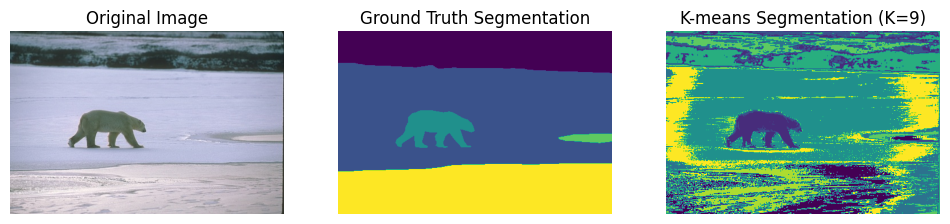

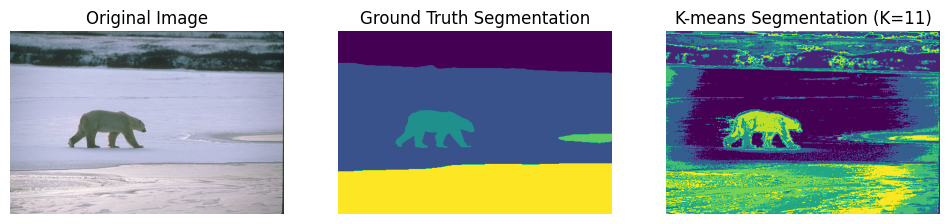

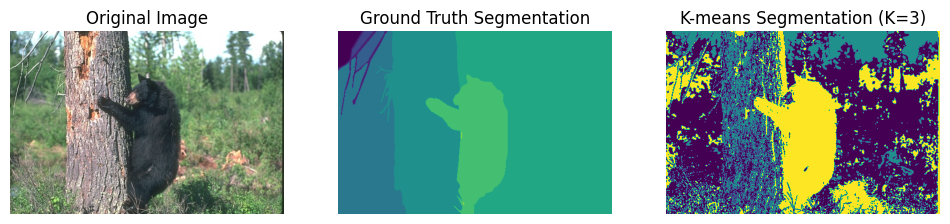

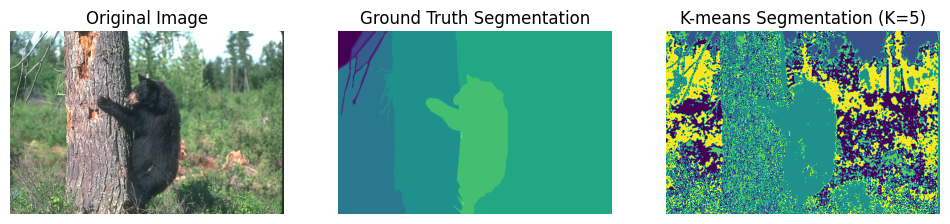

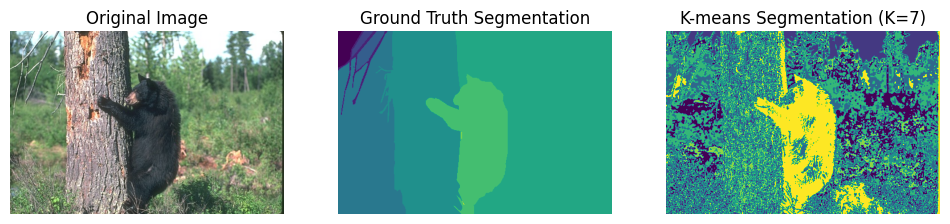

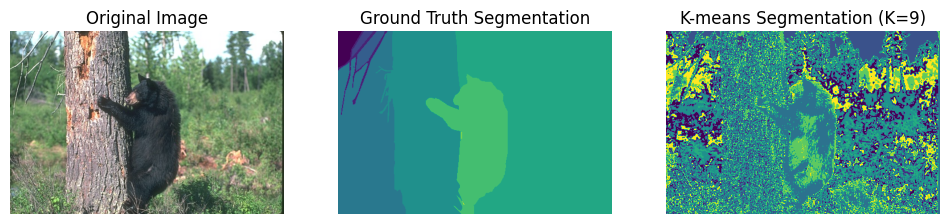

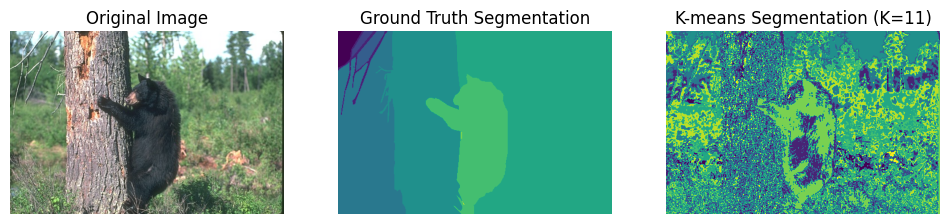

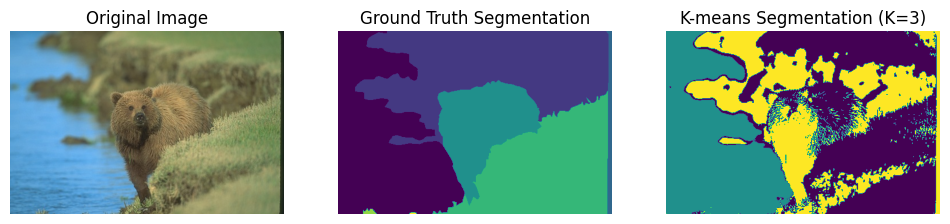

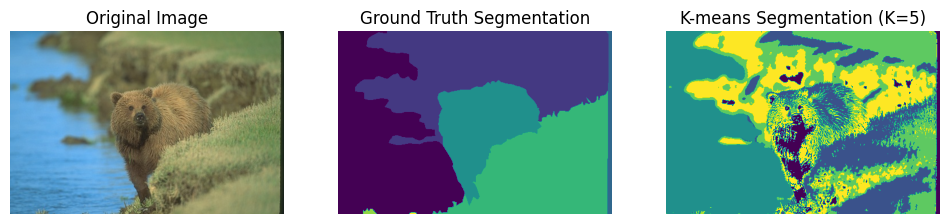

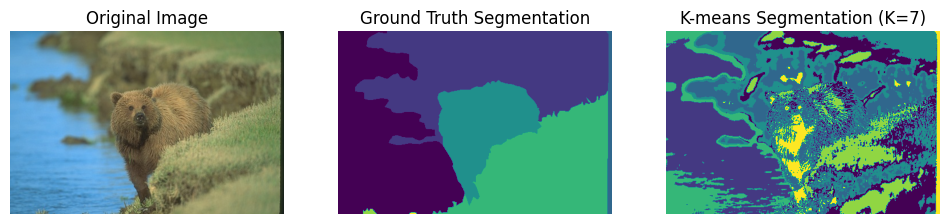

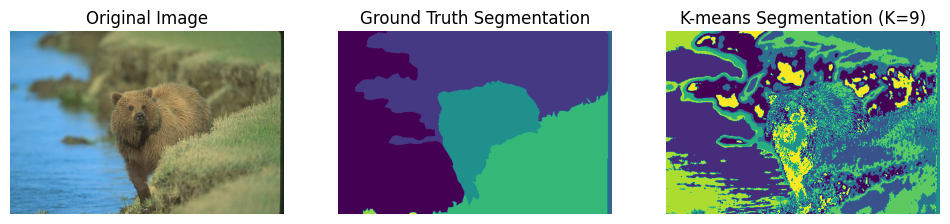

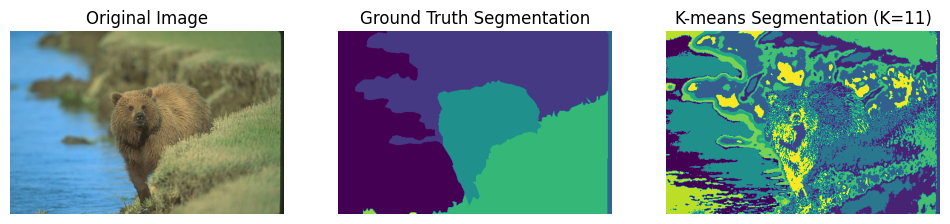

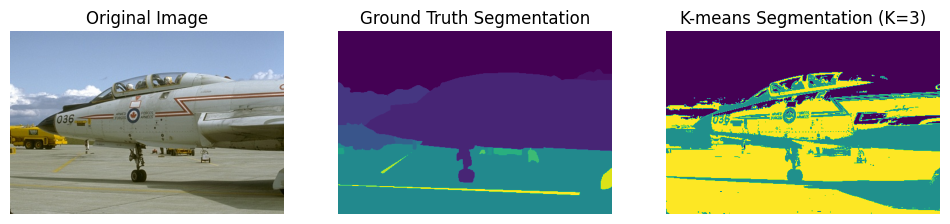

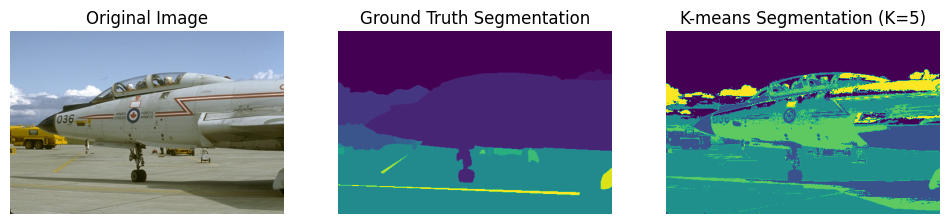

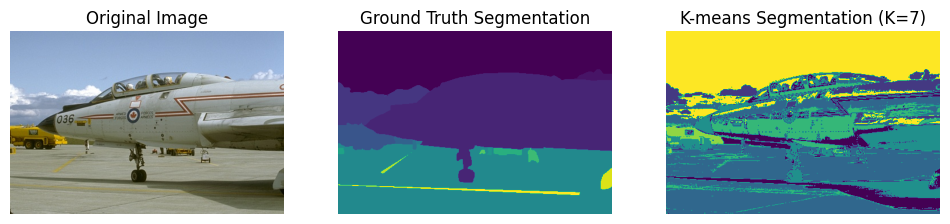

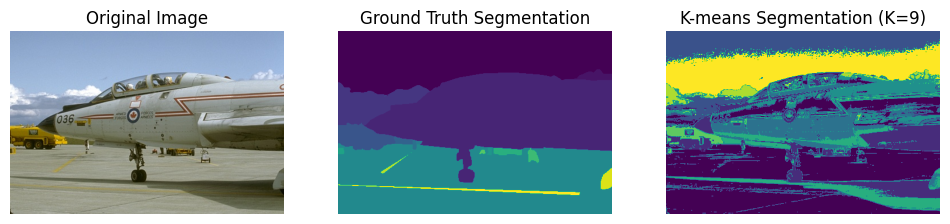

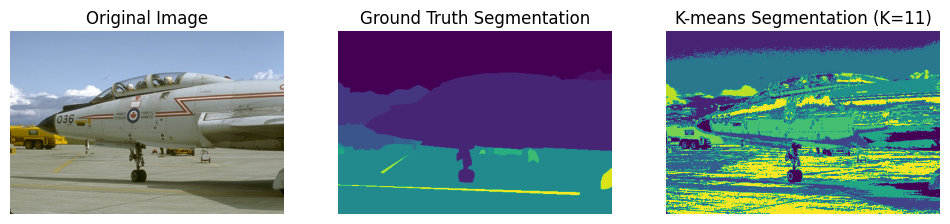

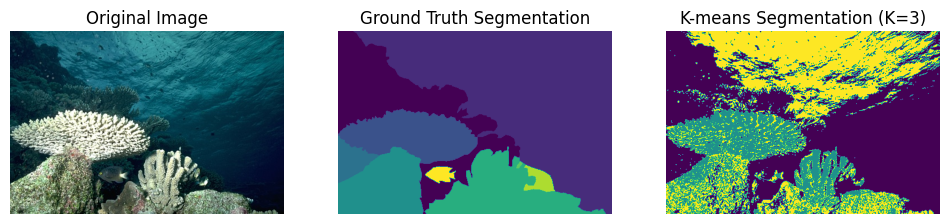

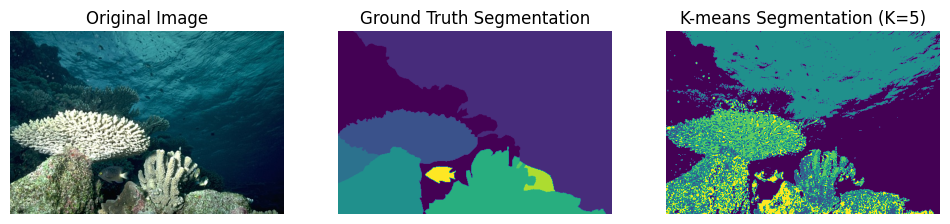

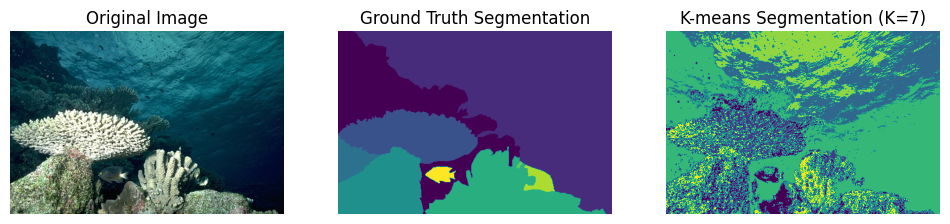

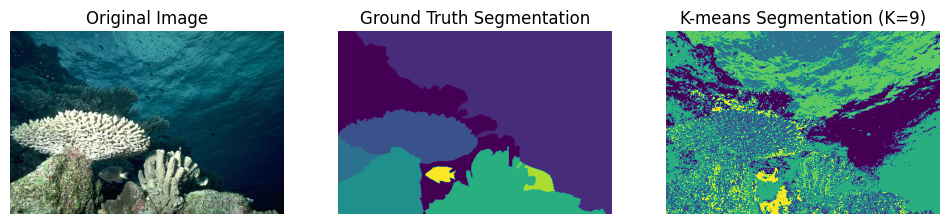

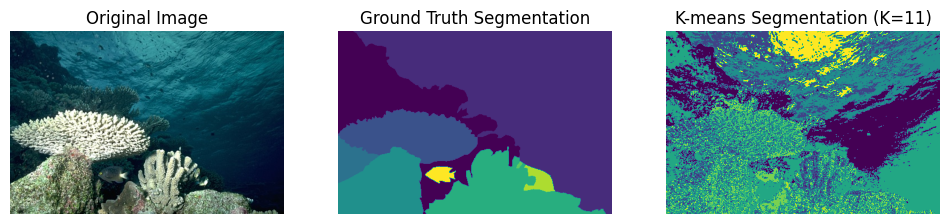

In [ ]:
for i in range(5) :
 show_comparision(i)

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph

def construct_5nn_graph(image):

    # Flatten the image to 1D
    flattened_image = image.reshape(-1, 1)

    # Construct 5-NN graph
    adjacency_matrix = kneighbors_graph(flattened_image, n_neighbors=5, mode='connectivity', include_self=False)

    return adjacency_matrix

def normalized_cut_segmentation(image, k):

    adjacency_matrix = construct_5nn_graph(image)

    # Apply Spectral Clustering
    spectral = SpectralClustering(n_clusters=k, affinity='precomputed', random_state=42)
    labels = spectral.fit_predict(adjacency_matrix)

    segmented_image = labels.reshape(image.shape[:2])
    return segmented_image

k_normalized_cut = 5
segmented_images_normalized_cut = []

for image_path in sample_test_image_paths:
    image = np.array(Image.open(image_path))
    segmented_image = normalized_cut_segmentation(image, k_normalized_cut)
    segmented_images_normalized_cut.append(segmented_image)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:248: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
# Example code to contrast results
for i, image_path in enumerate(sample_test_image_paths):
    image = np.array(Image.open(image_path))

    # K-Means segmentation
    segmented_image_kmeans = segmentation_results[5]
    # Normalized-Cut segmentation
    # segmented_images_normalized_cut

    # Display results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(segmented_image_kmeans, cmap='viridis')
    plt.title('K-Means Segmentation')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(segmented_images_normalized_cut, cmap='viridis')
    plt.title('Normalized-Cut Segmentation')
    plt.axis('off')

    plt.show()
